In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [130]:
df = pd.read_csv('outputs/comebacks_v1.csv')
df = df[df['largest_deficit']<=0]
df = df[df['game title'] != 'Oklahoma City Thunder at Dallas Mavericks']
print(len(df))

df['largest_deficit'] = df['largest_deficit']*-1
df['latest_deficit'] = df['latest_deficit']*-1

1215


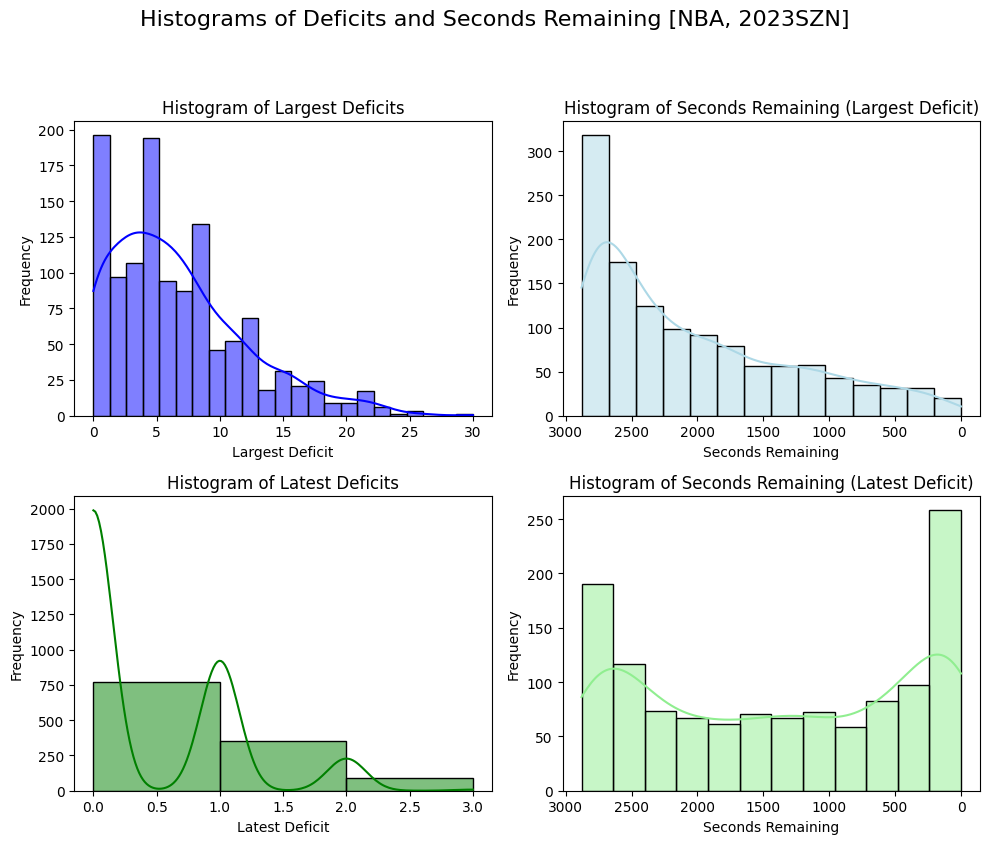

In [131]:
# Create a figure with four subplots (2x2 grid)
plt.figure(figsize=(10, 8))

# First histogram: largest_deficit
plt.subplot(2, 2, 1)
sns.histplot(
    df['largest_deficit'], 
    kde=True, 
    color='blue'
)
plt.title("Histogram of Largest Deficits")
plt.xlabel("Largest Deficit")
plt.ylabel("Frequency")

# Second histogram: largest_deficit_seconds_remaining
plt.subplot(2, 2, 2)
sns.histplot(
    df['largest_deficit_seconds_remaining'], 
    kde=True, 
    color='lightblue'
)
plt.title("Histogram of Seconds Remaining (Largest Deficit)")
plt.xlabel("Seconds Remaining")
plt.ylabel("Frequency")
plt.gca().invert_xaxis()  # Reverse x-axis

# Third histogram: latest_deficit
plt.subplot(2, 2, 3)
sns.histplot(
    df['latest_deficit'], 
    bins=(max(df['latest_deficit']) - min(df['latest_deficit'])),
    kde=True, 
    color='green'
)
plt.title("Histogram of Latest Deficits")
plt.xlabel("Latest Deficit")
plt.ylabel("Frequency")

# Fourth histogram: latest_deficit_seconds_remaining
plt.subplot(2, 2, 4)
sns.histplot(
    df['latest_deficit_seconds_remaining'], 
    kde=True, 
    color='lightgreen'
)
plt.title("Histogram of Seconds Remaining (Latest Deficit)")
plt.xlabel("Seconds Remaining")
plt.ylabel("Frequency")
plt.gca().invert_xaxis()  # Reverse x-axis

plt.suptitle("Histograms of Deficits and Seconds Remaining [NBA, 2023SZN]", fontsize=16, y=1.05)

plt.savefig("images/v2/2023_NBA_Hist", dpi=300)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [132]:
min_val = df['largest_deficit'].min()
max_val = df['largest_deficit'].max()
bins = np.arange(min_val, max_val + 5, 5)  # Creates bins with width 5

# Compute histogram
counts, bin_edges = np.histogram(df['largest_deficit'], bins=bins)

# Create a DataFrame with bin ranges and counts
hist_table = pd.DataFrame({
    'Range': [f"[{bin_edges[i]:.1f}, {bin_edges[i+1]:.1f})" for i in range(len(bin_edges) - 1)],
    'Count': counts
})

hist_table['Percent'] = hist_table['Count'] / len(df) * 100
hist_table

,Range,Count,Percent
0,"[0.0, 5.0)",496,40.823045
1,"[5.0, 10.0)",413,33.991770
2,"[10.0, 15.0)",184,15.144033
3,"[15.0, 20.0)",85,6.995885
4,"[20.0, 25.0)",33,2.716049
5,"[25.0, 30.0)",4,0.329218


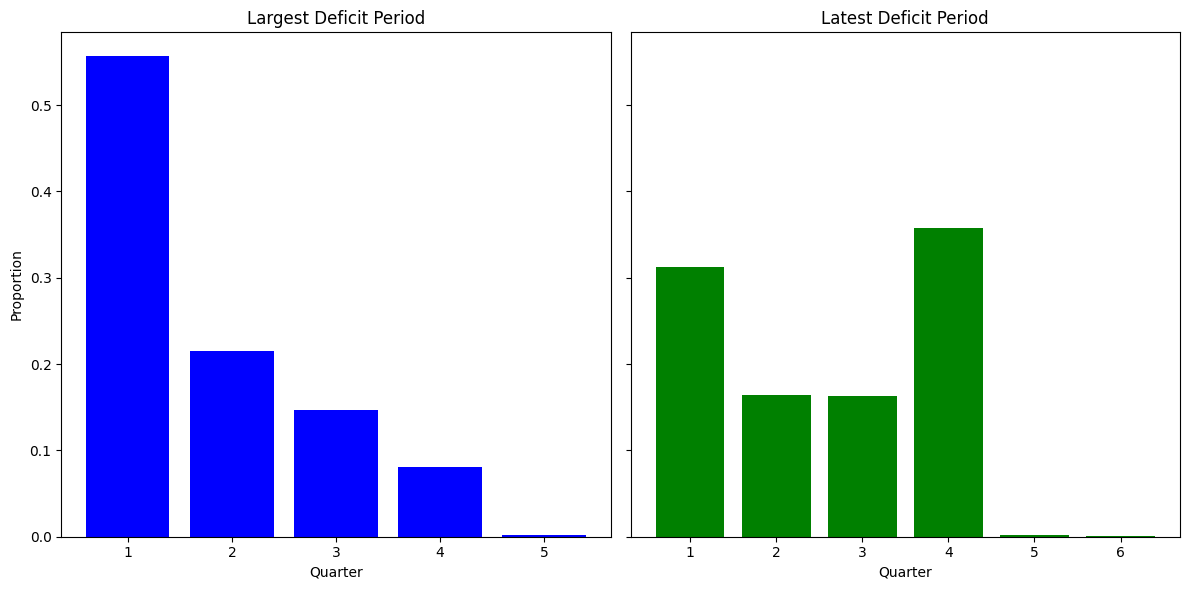

In [133]:
# Group data for largest_deficit_period
largest_quarters = df.groupby('largest_deficit_period').size()
largest_quarter_pct = largest_quarters / len(df)

# Group data for latest_deficit_period
latest_quarters = df.groupby('latest_deficit_period').size()
latest_quarter_pct = latest_quarters / len(df)

# Create subplots for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar chart for largest_deficit_period
axes[0].bar(
    height=largest_quarter_pct,
    x=np.arange(1, len(largest_quarters)+1),
    color='blue'
)
axes[0].set_title("Largest Deficit Period")
axes[0].set_xlabel("Quarter")
axes[0].set_ylabel("Proportion")

# Bar chart for latest_deficit_period
axes[1].bar(
    height=latest_quarter_pct,
    x=np.arange(1, len(latest_quarters)+1),
    color='green'
)
axes[1].set_title("Latest Deficit Period")
axes[1].set_xlabel("Quarter")

# Adjust layout
plt.tight_layout()
plt.show()

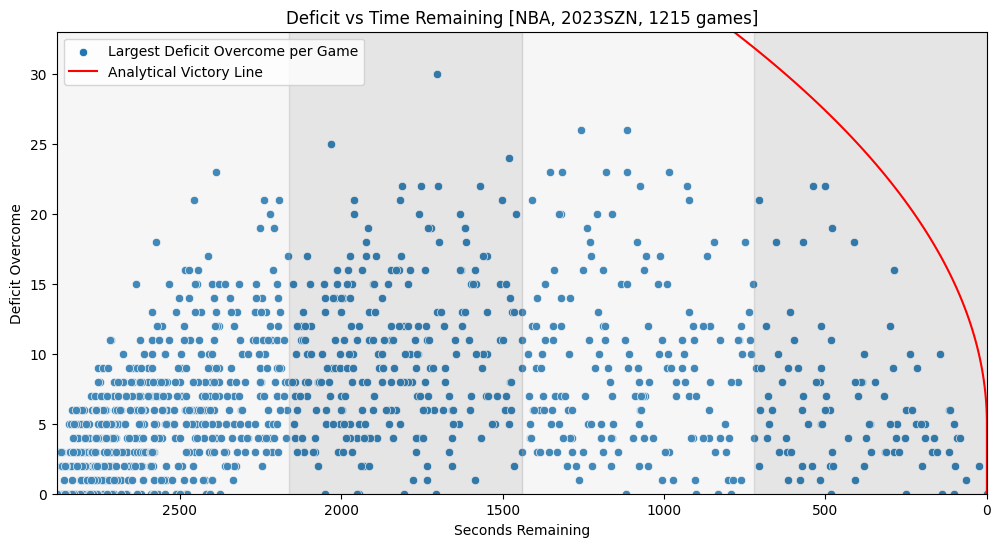

In [135]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='largest_deficit_seconds_remaining', y='largest_deficit', label='Largest Deficit Overcome per Game')

# Reverse the y-axis (negative numbers on top)
# plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Customizing the plot
plt.title(f"Deficit vs Time Remaining [NBA, 2023SZN, {len(df)} games]")
plt.xlabel("Seconds Remaining")
plt.ylabel("Deficit Overcome")

# Plot the analytical victory line
y_values = np.linspace(0, 40, 100)  # Generate 100 points for smooth line
x_values = np.where(y_values <= 5, 0, (y_values - 5) ** 2)

plt.plot(x_values, y_values, color='red', label='Analytical Victory Line')
# plt.plot(df['seconds_remaining'], slope * df['seconds_remaining'] + intercept, color='green', label=f"95% Quantile Line")

# plot gray boxes
plt.axvspan(0, 720, color="gray", alpha=0.2)
plt.axvspan(720, 1440, color="lightgray", alpha=0.2)
plt.axvspan(1440, 2160, color="gray", alpha=0.2)
plt.axvspan(2160, 2880, color="lightgray", alpha=0.2)

# limit x-axis to only 4 quarters
plt.xlim(2880, 0)
plt.ylim(0, max(df['largest_deficit'])*1.1)
plt.legend()

# Save
plt.savefig("images/v2/2023_NBA_largest", dpi=300)

# Show the plot
plt.show()

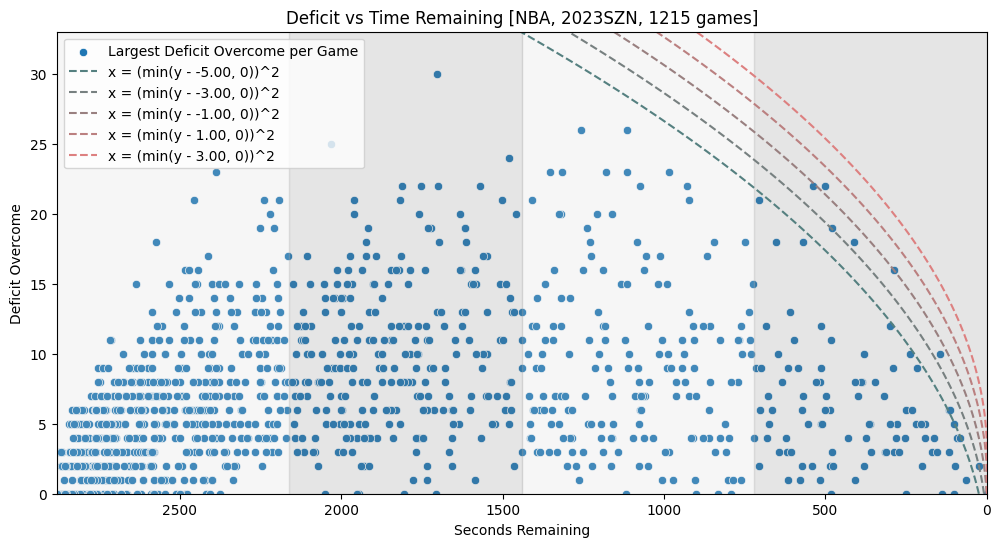

In [136]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='largest_deficit_seconds_remaining', y='largest_deficit', label='Largest Deficit Overcome per Game')

# Reverse the y-axis (negative numbers on top)
plt.gca().invert_xaxis()

# Customizing the plot
plt.title(f"Deficit vs Time Remaining [NBA, 2023SZN, {len(df)} games]")
plt.xlabel("Seconds Remaining")
plt.ylabel("Deficit Overcome")

y_values = np.linspace(0, 40, 100)  # Generate 100 points for smooth line
for num in np.arange(-5,5, 2):
    # plot the function
    x_values = np.where(y_values <= num, 0, (y_values - num) ** 2)
    plt.plot(x_values, y_values, color=((num+10)/15,0.5,0.5), linestyle='--', label=f'x = (min(y - {num:.2f}, 0))^2')
    # plt.plot(df['seconds_remaining'], slope * df['seconds_remaining'] + intercept, color='green', label=f"95% Quantile Line")

# plot gray boxes
plt.axvspan(0, 720, color="gray", alpha=0.2)
plt.axvspan(720, 1440, color="lightgray", alpha=0.2)
plt.axvspan(1440, 2160, color="gray", alpha=0.2)
plt.axvspan(2160, 2880, color="lightgray", alpha=0.2)

# limit x-axis to only 4 quarters
plt.xlim(2880, 0)
plt.ylim(0, max(df['largest_deficit'])*1.1)
plt.legend()

# Save
plt.savefig("images/v2/2023_NBA_largest_comparing_v1", dpi=300)

# Show the plot
plt.show()

C:\Users\cwpac\AppData\Local\Temp\ipykernel_23220\4071830362.py:16: RuntimeWarning: invalid value encountered in power
  x_values = np.where(y_values <= num, 0, (y_values - 5) ** num)


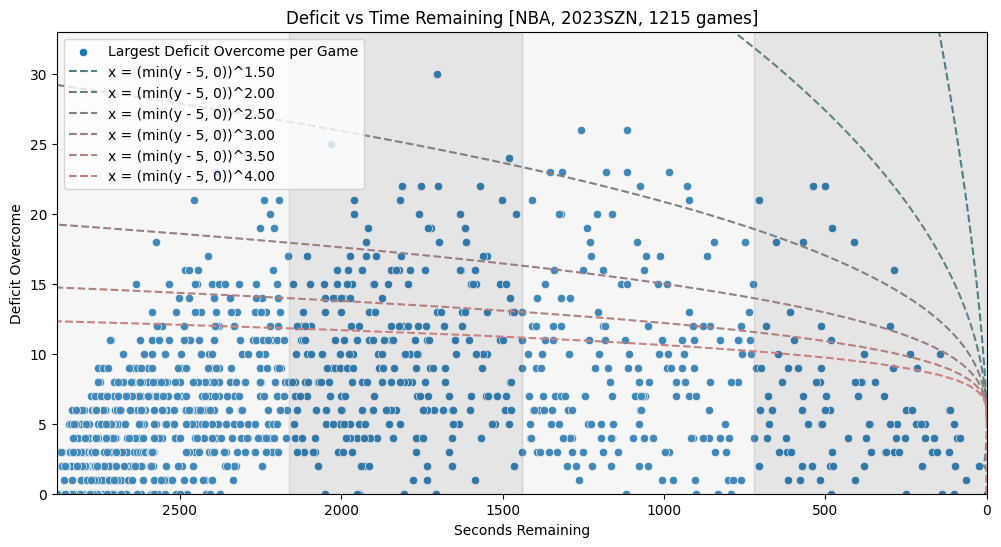

In [137]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='largest_deficit_seconds_remaining', y='largest_deficit', label='Largest Deficit Overcome per Game')

# Reverse the y-axis (negative numbers on top)
plt.gca().invert_xaxis()

# Customizing the plot
plt.title(f"Deficit vs Time Remaining [NBA, 2023SZN, {len(df)} games]")
plt.xlabel("Seconds Remaining")
plt.ylabel("Deficit Overcome")

y_values = np.linspace(0, 40, 100)  # Generate 100 points for smooth line
for num in np.arange(1.5,4.5, 0.5):
    # plot the function
    x_values = np.where(y_values <= num, 0, (y_values - 5) ** num)
    plt.plot(x_values, y_values, color=(num/5,0.5,0.5), linestyle='--', label=f'x = (min(y - 5, 0))^{num:.2f}')
    # plt.plot(df['seconds_remaining'], slope * df['seconds_remaining'] + intercept, color='green', label=f"95% Quantile Line")

# plot gray boxes
plt.axvspan(0, 720, color="gray", alpha=0.2)
plt.axvspan(720, 1440, color="lightgray", alpha=0.2)
plt.axvspan(1440, 2160, color="gray", alpha=0.2)
plt.axvspan(2160, 2880, color="lightgray", alpha=0.2)

# limit x-axis to only 4 quarters
plt.xlim(2880, 0)
plt.ylim(0, max(df['largest_deficit'])*1.1)
plt.legend()

# Save
plt.savefig("images/v2/2023_NBA_largest_comparing_v2", dpi=300)

# Show the plot
plt.show()

In [144]:
def random_distribution_mapping(df, x_col, y_col, quantile=0.95):
    result_list = []

    # randomly pick points within the range of the data
    # x = min(y-a, 0)^b
    for i in range(10000):
        a, b = [np.random.uniform(-100, 25), np.random.uniform(1, 5)]
        curve_x = np.maximum(df[y_col] - a, 0) ** b
        is_below = df[x_col] > curve_x
        proportion_is_below = is_below.mean()
        # print(x_col, y_col, a, b, proportion_is_below)
        result_list.append((a, b, proportion_is_below))

    return result_list

result_list = random_distribution_mapping(df, x_col='largest_deficit_seconds_remaining', y_col='largest_deficit', quantile=0.95)

result_df = pd.DataFrame(result_list, columns=['a', 'b', 'pct'])
result_df.sort_values('pct', ascending=False, inplace=True)

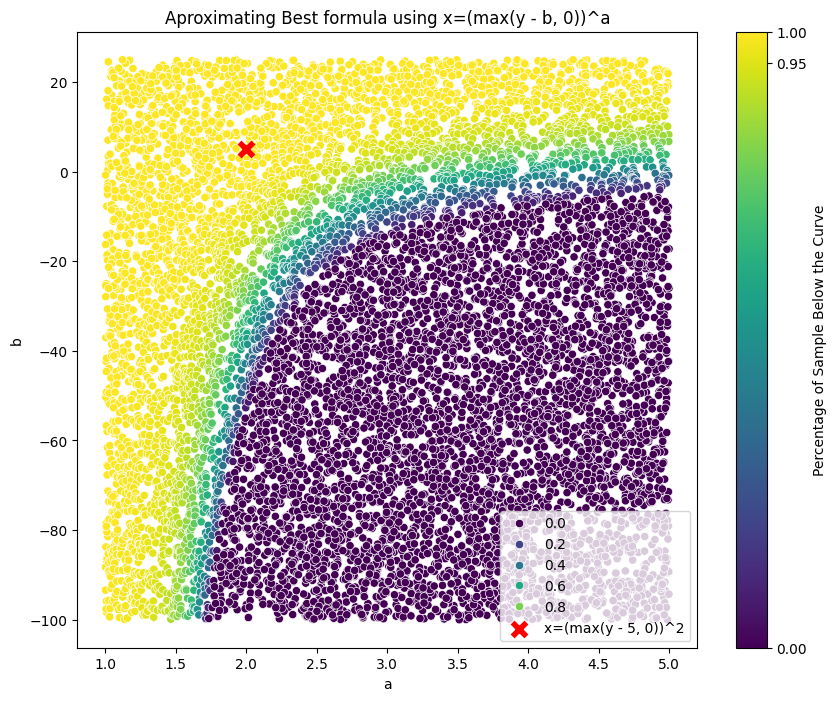

In [145]:

# Scatter plot of a vs b with pct as color
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=result_df,
    x='b',
    y='a',
    hue='pct',
    palette='viridis',
    sizes=(20, 200),
    legend='brief'
)

# Add a single red dot at b = 5, a = 2
plt.scatter(2, 5, color='red', s=100, label='x=(max(y - 5, 0))^2', marker='x', linewidths=4)

# Create a ScalarMappable for the color bar
norm = plt.Normalize(vmin=result_df['pct'].min(), vmax=result_df['pct'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Add a color bar
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label("Percentage of Sample Below the Curve")
cbar.ax.set_yticks([0, 0.95, 1])  # Add ticks for 0, 0.95, and 1

plt.legend(loc='lower right')
plt.title("Aproximating Best formula using x=(max(y - b, 0))^a")
plt.xlabel("a")
plt.ylabel("b")

plt.savefig("images/v2/2023_NBA_finding_a_and_b", dpi=300)
plt.show()

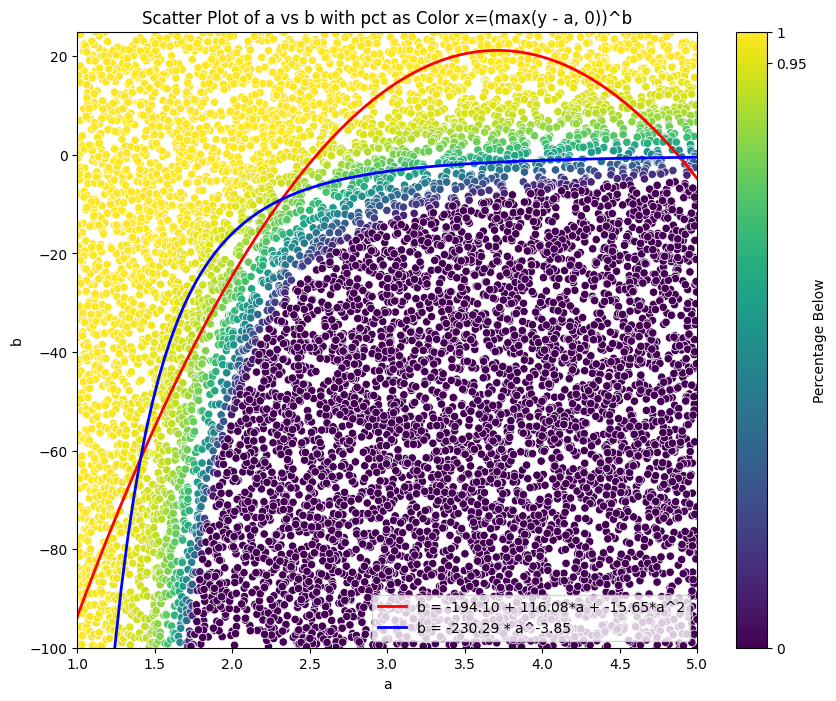

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

# filter for lines of best fit
quantile = 0.95
tolerance = 0.03
filtered_df = result_df[(result_df['pct'] >= quantile - tolerance) & (result_df['pct'] <= quantile + tolerance)]

# Extract a and b values for fitting
a_values = filtered_df['b'].values
b_values = filtered_df['a'].values

def generate_polynomial_fit(result_df: pd.DataFrame, a_values, b_values):
    a_values = a_values.reshape(-1, 1)
    # Fit a polynomial regression model (degree 2 for simplicity)
    poly = PolynomialFeatures(degree=2)
    a_poly = poly.fit_transform(a_values)

    model = LinearRegression()
    model.fit(a_poly, b_values)

    # Generate predictions for the fitted curve
    a_range = np.linspace(result_df['b'].min(), result_df['b'].max(), 100).reshape(-1, 1)
    a_range_poly = poly.transform(a_range)
    b_predicted = model.predict(a_range_poly)

    return a_range, b_predicted, model

def generate_power_law_fit(resuresult_df: pd.DataFrame, a_values, b_values):
    # Define the power-law function b = c * a^d
    def power_law(a, c, d):
        return c * a**d

    # Fit the data to the power-law function
    params, _ = curve_fit(power_law, a_values, b_values)

    # Generate predictions for the fitted curve
    a_range = np.linspace(result_df['b'].min(), result_df['b'].max(), 100)
    b_predicted = power_law(a_range, *params)

    return a_range, b_predicted, params

# def generate_quadratic_fit(result_df: pd.DataFrame, a_values, b_values):
#     # Define the quadratic function b = c * (a - d)^2
#     def quadratic_func(a, c, d):
#         return c * (a - d)**2

#     # Provide bounds for c and d
#     bounds = ([-100, -np.inf], [np.inf, np.inf])

#     # Fit the data to the quadratic function
#     params, _ = curve_fit(quadratic_func, a_values, b_values, bounds=bounds)

#     # Generate predictions for the fitted curve
#     a_range = np.linspace(result_df['b'].min(), result_df['b'].max(), 100)
#     b_predicted = quadratic_func(a_range, *params)

#     return a_range, b_predicted, params

# best fit lines
a_range_2, b_predicted_2, model_2 = generate_polynomial_fit(result_df, a_values, b_values) #polynomial
a_range_power, b_predicted_power, params_power = generate_power_law_fit(result_df, a_values, b_values) #power law
# a_range_quad, b_predicted_quad, params_quad = generate_quadratic_fit(result_df, a_values, b_values) #quadratic

# Scatter plot of a vs b with pct as color
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=result_df,
    x='b',
    y='a',
    hue='pct',
    palette='viridis',
    sizes=(20, 200),
    legend=False
)

# Plot the fitted line
plt.plot(a_range_2, b_predicted_2, color='red', label=f'b = {model_2.intercept_:.2f} + {model_2.coef_[1]:.2f}*a + {model_2.coef_[2]:.2f}*a^2', linewidth=2)
plt.plot(a_range_power, b_predicted_power, color='blue', label=f'b = {params_power[0]:.2f} * a^{params_power[1]:.2f}', linewidth=2)
# plt.plot(a_range_quad, b_predicted_quad, color='blue', label=f'b = {params_quad[0]:.2f} * (a - {params_quad[1]:.2f})^2', linewidth=2)


# Add a color bar
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label("Percentage Below")
cbar.ax.set_yticks([0, quantile, 1])  # Add ticks for 0, 0.quantile, and 1
cbar.ax.set_yticklabels(["0", f"{quantile}", "1"])  # Label the ticks

plt.ylim(-100, 25)
plt.xlim(1, 5)

plt.legend(loc='lower right')

plt.title("Scatter Plot of a vs b with pct as Color x=(max(y - a, 0))^b")
plt.xlabel("a")
plt.ylabel("b")

plt.savefig("images/v2/2023_NBA_approximating_95_pct", dpi=300)
plt.show()

x=(min(y - -15.94, 0))^2
For a = 2, b = -15.94, 92.5925925925926 points are below the line.
x=(min(y - -3.34, 0))^3
For a = 3, b = -3.34, 68.23045267489712 points are below the line.
x=(min(y - -1.10, 0))^4
For a = 4, b = -1.10, 48.72427983539095 points are below the line.


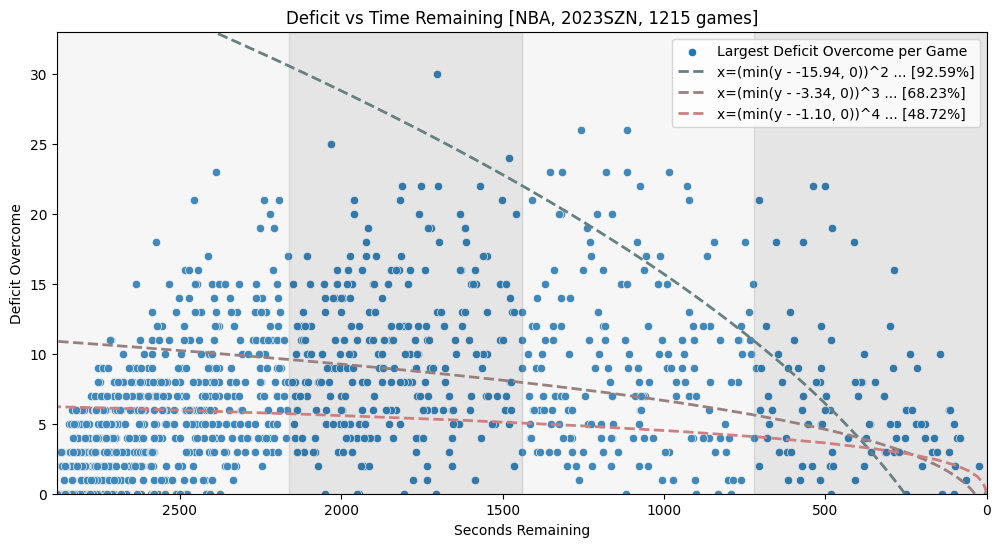

In [147]:
def find_a_and_b_from_equation(params_power, a_value):
    c, d = params_power
    return c * (a_value ** d)

def equation(x, a, b):
    x = 0 if x<= b else x
    return (x - b) ** a

# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='largest_deficit_seconds_remaining', y='largest_deficit', label='Largest Deficit Overcome per Game')

# Reverse the y-axis (negative numbers on top)
plt.gca().invert_xaxis()

# Customizing the plot
plt.title(f"Deficit vs Time Remaining [NBA, 2023SZN, {len(df)} games]")
plt.xlabel("Seconds Remaining")
plt.ylabel("Deficit Overcome")

y_values = np.linspace(0, 40, 100)  # Generate 100 points for smooth line
for a_val in np.arange(2, 5, 1):
    b_val = find_a_and_b_from_equation(params_power, a_val)
    print(f"x=(min(y - {b_val:.2f}, 0))^{a_val}")
    x_values = np.where(y_values <= b_val, 0, (y_values - b_val) ** a_val)

    # Calculate how many points are below the line
    below_count = 0
    for index, row in df.iterrows():
        y_point = row['largest_deficit']
        x_point = row['largest_deficit_seconds_remaining']
        x_val = equation(y_point, a_val, b_val)
        # print(f"a: {a_val}, b: b{b_val}, xp: {x_point}, xv: {x_val}")
        if x_point > x_val:
            below_count += 1
    below_count = below_count / len(df) * 100
    print(f"For a = {a_val}, b = {b_val:.2f}, {below_count} points are below the line.")


    plt.plot(x_values, y_values, color=(a_val/5,0.5,0.5), linestyle='--', label=f'x=(min(y - {b_val:.2f}, 0))^{a_val} ... [{below_count:.2f}%]', linewidth=2)

# plot gray boxes
plt.axvspan(0, 720, color="gray", alpha=0.2)
plt.axvspan(720, 1440, color="lightgray", alpha=0.2)
plt.axvspan(1440, 2160, color="gray", alpha=0.2)
plt.axvspan(2160, 2880, color="lightgray", alpha=0.2)

# limit x-axis to only 4 quarters
plt.xlim(2880, 0)
plt.ylim(0, max(df['largest_deficit'])*1.1)
plt.legend()

# Save
plt.savefig("images/v2/2023_NBA_three_best_lines_v1", dpi=300)

# Show the plot
plt.show()